In [7]:
import pandas as pd

In [8]:
data=pd.read_csv("/kaggle/input/zelta-btc/BTC_2020_2024_1h.csv")

In [9]:
data.head()

,Unnamed: 0,datetime,open,high,low,close,volume
0,0.0,01-01-2020 00:00,7189.43,7190.52,7170.15,7171.55,2449.049
1,1.0,01-01-2020 01:00,7171.43,7225.00,7171.10,7210.24,3865.038
2,2.0,01-01-2020 02:00,7210.38,7239.30,7206.46,7237.99,3228.365
3,3.0,01-01-2020 03:00,7237.41,7239.74,7215.00,7221.65,2513.307
4,4.0,01-01-2020 04:00,7221.80,7225.41,7211.22,7213.86,1176.666


In [10]:
data=data[:35065]

In [11]:
data.tail()

,Unnamed: 0,datetime,open,high,low,close,volume
35060,35060.0,31-12-2023 20:00,42659.9,42724.5,42543.3,42599.1,4730.936
35061,35061.0,31-12-2023 21:00,42599.2,42717.0,42558.2,42558.9,3794.010
35062,35062.0,31-12-2023 22:00,42559.0,42629.5,42111.9,42294.8,11952.346
35063,35063.0,31-12-2023 23:00,42294.8,42380.1,42083.1,42314.0,11676.465
35064,35064.0,01-01-2024 00:00,42314.0,42603.2,42289.6,42503.5,8459.477


In [12]:
# Assuming 'data' is a Pandas DataFrame or a NumPy array
split_ratio = 0.1  # 10% for the test set
split_index = int(len(data) * (1 - split_ratio))

train_data = data[:split_index]  # First 90% of the data
test_data = data[split_index:]   # Last 10% of the data

In [13]:
test_data

,Unnamed: 0,datetime,open,high,low,close,volume
31558,31558.0,07-08-2023 22:00,29184.2,29198.2,29154.0,29170.6,5671.672
31559,31559.0,07-08-2023 23:00,29170.7,29211.0,29151.5,29202.7,4058.722
31560,31560.0,08-08-2023 00:00,29202.7,29254.8,29171.8,29253.9,6278.609
31561,31561.0,08-08-2023 01:00,29253.8,29255.0,29135.0,29140.8,7481.066
31562,31562.0,08-08-2023 02:00,29140.9,29195.0,29132.4,29160.8,4233.921
...,...,...,...,...,...,...,...
35060,35060.0,31-12-2023 20:00,42659.9,42724.5,42543.3,42599.1,4730.936
35061,35061.0,31-12-2023 21:00,42599.2,42717.0,42558.2,42558.9,3794.010
35062,35062.0,31-12-2023 22:00,42559.0,42629.5,42111.9,42294.8,11952.346
35063,35063.0,31-12-2023 23:00,42294.8,42380.1,42083.1,42314.0,11676.465


In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
# Parse the datetime column with dayfirst=True
train_data['datetime'] = pd.to_datetime(train_data['datetime'], dayfirst=True)
test_data['datetime'] = pd.to_datetime(test_data['datetime'], dayfirst=True)

# Sort data by datetime
train_data = train_data.sort_values('datetime')
test_data = test_data.sort_values('datetime')

<ipython-input-15-26285069f241>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['datetime'] = pd.to_datetime(train_data['datetime'], dayfirst=True)
<ipython-input-15-26285069f241>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['datetime'] = pd.to_datetime(test_data['datetime'], dayfirst=True)


In [16]:
!dpkg -i /kaggle/input/ta-lib-0-4-28/libta.deb /kaggle/input/ta-lib-0-4-28/ta.deb
!pip install /kaggle/input/ta-lib-0-4-28/TA_Lib-0.4.28-cp310-cp310-linux_x86_64.whl

Selecting previously unselected package libta-lib0.
(Reading database ... 127400 files and directories currently installed.)
Preparing to unpack .../input/ta-lib-0-4-28/libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack .../input/ta-lib-0-4-28/ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtcm.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libumf.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtcm_debug.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libhwloc.so.15 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_loader.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_level_zero.

In [17]:
train_data

,Unnamed: 0,datetime,open,high,low,close,volume
0,0.0,2020-01-01 00:00:00,7189.43,7190.52,7170.15,7171.55,2449.049
1,1.0,2020-01-01 01:00:00,7171.43,7225.00,7171.10,7210.24,3865.038
2,2.0,2020-01-01 02:00:00,7210.38,7239.30,7206.46,7237.99,3228.365
3,3.0,2020-01-01 03:00:00,7237.41,7239.74,7215.00,7221.65,2513.307
4,4.0,2020-01-01 04:00:00,7221.80,7225.41,7211.22,7213.86,1176.666
...,...,...,...,...,...,...,...
31553,31553.0,2023-08-07 17:00:00,28930.30,28979.80,28854.80,28965.10,14863.431
31554,31554.0,2023-08-07 18:00:00,28965.20,29177.00,28958.60,29080.00,30887.713
31555,31555.0,2023-08-07 19:00:00,29080.00,29144.90,29040.00,29144.90,9930.092
31556,31556.0,2023-08-07 20:00:00,29144.90,29194.70,29107.70,29186.50,8257.521


In [19]:
import talib as t
import numpy as np

# Assuming train_data and test_data are DataFrames with the required columns
class DataProcessor:
    def __init__(self, df):
        self.df = df

    def compute_indicators(self): 
        
        # Relative Strength Index
        rsi_period=14
        self.df['RSI_14']=t.RSI(self.df['close'], timeperiod=rsi_period)

        #Moving Average Convergence Divergence
        #self.df['MACD_diff_1'],self.df['MACD_diff_2'],self.df['MACD_diff_3']= t.MACD(self.df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
         #_,,_= t.MACD(self.df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
        _,_,self.df['MACD_diff']= t.MACD(self.df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
        
        #Average True Range
        atr_period=14
        self.df['ATR_14']=t.ATR(self.df['high'], self.df['low'], self.df['close'], timeperiod=atr_period)

        # Commodity Channel Index (CCI)
        cci_period = 20
        self.df['CCI_20'] = t.CCI(self.df['high'], self.df['low'], self.df['close'], timeperiod=cci_period)

        # TRIX (Triple Exponential Average)
        trix_period = 15
        self.df['TRIX_15'] = t.TRIX(self.df['close'], timeperiod=trix_period)

        # Mass Index
        mass_index_period = 25
        high_low_diff = self.df['high'] - self.df['low']
        ema_9 = t.EMA(high_low_diff, timeperiod=9)
        ema_ema_9 = t.EMA(ema_9, timeperiod=9)
        ema_ratio=ema_9/ema_ema_9
        self.df['Mass_Index_25'] = ema_ratio.rolling(window=mass_index_period).sum()

        # Detrended Price Oscillator (DPO)
        dpo_period = 20
        sma = t.SMA(self.df['close'], timeperiod=dpo_period)
        self.df['DPO_20'] = self.df['close'] - sma

        # KST Oscillator Difference from Signal Line
        kst = t.KAMA(self.df['close'], timeperiod=30) - t.EMA(self.df['close'], timeperiod=9)
        kst_signal = t.SMA(kst, timeperiod=9)
        self.df['KST_Diff_30'] = kst - kst_signal

        # Schaff Trend Cycle (STC)
        stc_period = 10
        fast_k = t.STOCHF(self.df['close'], self.df['high'], self.df['low'], fastk_period=stc_period)[0]
        self.df['STC_10'] = t.EMA(fast_k, timeperiod=stc_period)

        # Stochastic Oscillator
        stochastic_k, stochastic_d = t.STOCH(self.df['high'], self.df['low'], self.df['close'], fastk_period=14, slowk_period=3, slowd_period=3)
        self.df['Stochastic_K_14'] = stochastic_k
        self.df['Stochastic_D_14'] = stochastic_d

        # Ultimate Oscillator
        self.df['Ultimate_Oscillator'] = t.ULTOSC(self.df['high'], self.df['low'], self.df['close'], timeperiod1=7, timeperiod2=14, timeperiod3=28)

        # Williams %R
        willr_period = 14
        self.df['Williams_%R_14'] = t.WILLR(self.df['high'], self.df['low'], self.df['close'], timeperiod=willr_period)

        # Awesome Oscillator
        ao_short_period = 5
        ao_long_period = 34
        median_price = (self.df['high'] + self.df['low']) / 2
        self.df['Awesome_Oscillator_5_34'] = t.SMA(median_price, timeperiod=ao_short_period) - t.SMA(median_price, timeperiod=ao_long_period)

        # Percentage Price Oscillator (PPO) Difference from Signal Line
        ppo = t.PPO(self.df['close'], fastperiod=12, slowperiod=26)
        ppo_signal = t.SMA(ppo, timeperiod=9)
        self.df['PPO_Diff_12_26'] = ppo - ppo_signal

        # Percentage Volume Oscillator (PVO) Difference from Signal Line
        pvo = t.PPO(self.df['volume'], fastperiod=12, slowperiod=26)
        pvo_signal = t.SMA(pvo, timeperiod=9)
        self.df['PVO_Diff_12_26'] = pvo - pvo_signal

        # Coefficient of Variance
        cov_period = 30
        rolling_std = self.df['close'].rolling(window=cov_period).std()
        rolling_mean = self.df['close'].rolling(window=cov_period).mean()
        self.df['Coefficient_of_Variance_30'] = (rolling_std / rolling_mean) * 100

        # Ulcer Index
        ulcer_index_period = 14
        max_price = self.df['close'].rolling(window=ulcer_index_period).max()
        squared_deviation = ((self.df['close'] - max_price) / max_price) ** 2
        self.df['Ulcer_Index_14'] = squared_deviation.rolling(window=ulcer_index_period).mean().apply(np.sqrt)
        
        # Chaikin Money Flow (CMF)
        fast_period = 3  
        slow_period = 20 
        cmf = t.ADOSC(self.df['high'], self.df['low'], self.df['close'], self.df['volume'], fastperiod=fast_period, slowperiod=slow_period)
        self.df['CMF_3_20'] = cmf 

        # Ease of Movement (EoM)
        distance_moved = (self.df['high'] + self.df['low']) / 2 - (self.df['high'].shift(1) + self.df['low'].shift(1)) / 2
        box_ratio = self.df['volume'] / (self.df['high'] - self.df['low'])
        self.df['Ease_of_Movement'] = distance_moved / box_ratio

        # Average Directional Index (ADX)
        adx_period = 14
        self.df['ADX_14'] = t.ADX(self.df['high'], self.df['low'], self.df['close'], timeperiod=adx_period)
        
        return self.df

# Process train and test data
train_processor = DataProcessor(train_data)
train_data = train_processor.compute_indicators()

test_processor = DataProcessor(test_data)
test_data = test_processor.compute_indicators()

In [20]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [21]:
# Select columns to scale
features = ['open', 'high', 'low', 'close', 'volume'] + [col for col in train_data.columns if col not in ['datetime', 'close']]

# Scale the train and test data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[features])
test_scaled = scaler.transform(test_data[features])

# Extract the target variable
train_close = scaler.fit_transform(train_data[['close']])[:, 0]
test_close = scaler.transform(test_data[['close']])[:, 0]

In [22]:
def create_sequences(data, target, sequence_length):
    """
    Create sequences of input features and corresponding targets for LSTM.
    :param data: Scaled feature dataset (numpy array).
    :param target: Scaled target values (numpy array).
    :param sequence_length: Number of time steps to include in each sequence.
    :return: X (features), y (targets).
    """
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, :])  # Include all columns as features
        y.append(target[i])
    return np.array(X), np.array(y)

sequence_length = 100  # Number of past time steps to use for prediction
X_train, y_train = create_sequences(train_scaled, train_close, sequence_length)
X_test, y_test = create_sequences(test_scaled, test_close, sequence_length)

In [23]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [24]:
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

In [25]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Layer, Multiply, Permute
from tensorflow.keras.optimizers import Adam
import numpy as np

class SelfAttention(Layer):
    def __init__(self, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],), initializer="zeros", trainable=True)
        self.u = self.add_weight(shape=(input_shape[-1],), initializer="random_normal", trainable=True)
        super(SelfAttention, self).build(input_shape)

    def call(self, x):
        # Calculate attention scores
        score = tf.nn.tanh(tf.tensordot(x, self.W, axes=[-1, 0]) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.u, axes=[-1, 0]), axis=1)
        # Multiply the weights with the input and sum
        context_vector = tf.reduce_sum(x * tf.expand_dims(attention_weights, -1), axis=1)
        return context_vector

# Build the deeper LSTM model with self-attention
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(100, return_sequences=True),  # First LSTM layer
    Dropout(0.2),                      # Regularization
    LSTM(100, return_sequences=True),  # Second LSTM layer
    Dropout(0.2),
    SelfAttention(),                   # Self-Attention layer
    Dense(50, activation='relu'),      # Fully connected layer
    Dense(1)                           # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 100)            │          52,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ self_attention (SelfAttention)       │ (None, 100)                 │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 148,501 (580.08 KB)

 Trainable params: 148,501 (580.08 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Add, GlobalAveragePooling1D
# from tensorflow.keras.optimizers import Adam

# class TransformerBlock(tf.keras.layers.Layer):
#     def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
#         super(TransformerBlock, self).__init__()
#         self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
#         self.ffn = tf.keras.Sequential([
#             Dense(ff_dim, activation="relu"),  # Feed-forward layer
#             Dense(embed_dim),
#         ])
#         self.layernorm1 = LayerNormalization(epsilon=1e-6)
#         self.layernorm2 = LayerNormalization(epsilon=1e-6)
#         self.dropout1 = Dropout(rate)
#         self.dropout2 = Dropout(rate)

#     def call(self, inputs, training=None):  # Add `training` as a default argument
#         # Multi-head attention
#         attn_output = self.att(inputs, inputs)
#         attn_output = self.dropout1(attn_output, training=training)  # Pass `training` to Dropout
#         out1 = self.layernorm1(inputs + attn_output)  # Add & Norm
#         # Feed-forward network
#         ffn_output = self.ffn(out1)
#         ffn_output = self.dropout2(ffn_output, training=training)  # Pass `training` to Dropout
#         return self.layernorm2(out1 + ffn_output)  # Add & Norm
        
# # Define a Transformer-based model
# def build_transformer_model(input_shape, embed_dim, num_heads, ff_dim, num_blocks, dropout_rate=0.1):
#     inputs = Input(shape=input_shape)
    
#     # Embedding (Dense layer for time series)
#     x = Dense(embed_dim)(inputs)
    
#     # Add multiple Transformer blocks
#     for _ in range(num_blocks):
#         x = TransformerBlock(embed_dim, num_heads, ff_dim, rate=dropout_rate)(x)
    
#     # Global average pooling to reduce sequence dimension
#     x = GlobalAveragePooling1D()(x)
#     x = Dropout(dropout_rate)(x)
    
#     # Fully connected layers
#     x = Dense(50, activation="relu")(x)
#     x = Dropout(dropout_rate)(x)
#     outputs = Dense(1)(x)  # Output layer for regression
    
#     model = Model(inputs, outputs)
#     return model

# # Model parameters
# embed_dim = 64  # Embedding dimension
# num_heads = 4   # Number of attention heads
# ff_dim = 128    # Feed-forward layer dimension
# num_blocks = 2  # Number of Transformer blocks

# transformer_model = build_transformer_model(
#     input_shape=(X_train.shape[1], X_train.shape[2]),
#     embed_dim=embed_dim,
#     num_heads=num_heads,
#     ff_dim=ff_dim,
#     num_blocks=num_blocks,
#     dropout_rate=0.1
# )

# # Compile the model
# transformer_model.compile(optimizer=Adam(learning_rate=0.001), loss="mae")

# # Summary
# transformer_model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 60, 33)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_4 (Cast)                        │ (None, 60, 33)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 60, 64)              │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_7                  │ (None, 60, 64)              │          83,200 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_8                  │ (None, 60, 64)              │          83,200 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,877 (671.39 KB)

 Trainable params: 171,877 (671.39 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=40,
    batch_size=64,  # Adjust batch size for GPU memory
    verbose=1
)

Epoch 1/40
491/491 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 0.0340 - val_loss: 0.0065
Epoch 2/40
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0116 - val_loss: 0.0085
Epoch 3/40
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0094 - val_loss: 0.0202
Epoch 4/40
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0100 - val_loss: 0.0039
Epoch 5/40
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0082 - val_loss: 0.0049
Epoch 6/40
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0082 - val_loss: 0.0075
Epoch 7/40
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0075 - val_loss: 0.0119
Epoch 8/40
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0074 - val_loss: 0.0052
Epoch 9/40
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 10/40
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0068 - val_loss: 0.0030
Epoch 11/40
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0072 - val_loss: 0.0029
Epoch 12/40
491/491 ━━━━━━━━━━━━━━━━━━━━

In [28]:
# Evaluate on test data
test_predictions = model.predict(X_test)

# Rescale predictions back to original scale
test_predictions = scaler.inverse_transform(
    np.hstack((np.zeros((len(test_predictions), 4)), test_predictions))
)[:, 4]

# Actual test data
y_test_actual = scaler.inverse_transform(
    np.hstack((np.zeros((len(y_test), 4)), y_test.reshape(-1, 1)))
)[:, 4]

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [31]:
model.save("/kaggle/working/LSTM+SA.h5")

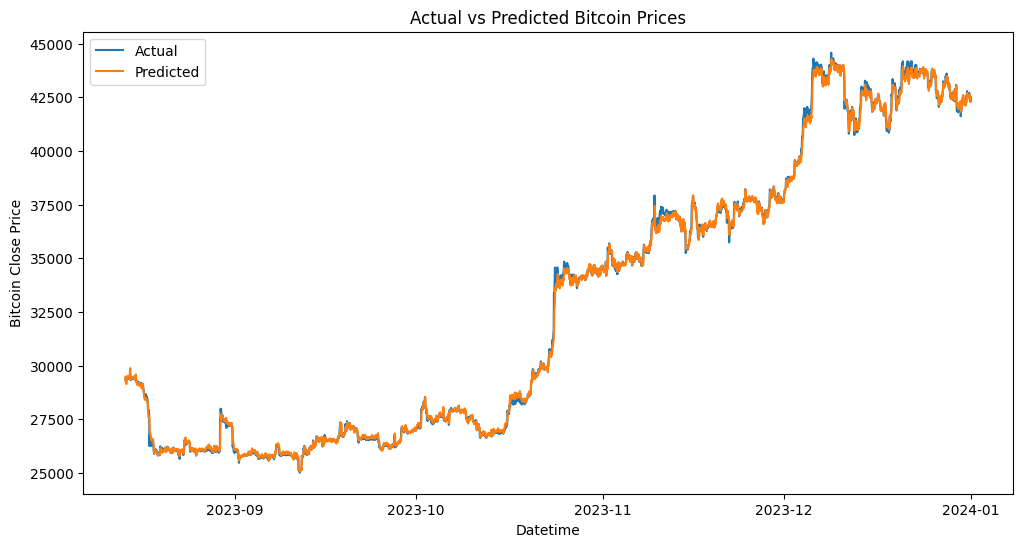

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data['datetime'][sequence_length:], y_test_actual, label="Actual")
plt.plot(test_data['datetime'][sequence_length:], test_predictions, label="Predicted")
plt.xlabel("Datetime")
plt.ylabel("Bitcoin Close Price")
plt.title("Actual vs Predicted Bitcoin Prices")
plt.legend()
plt.show()

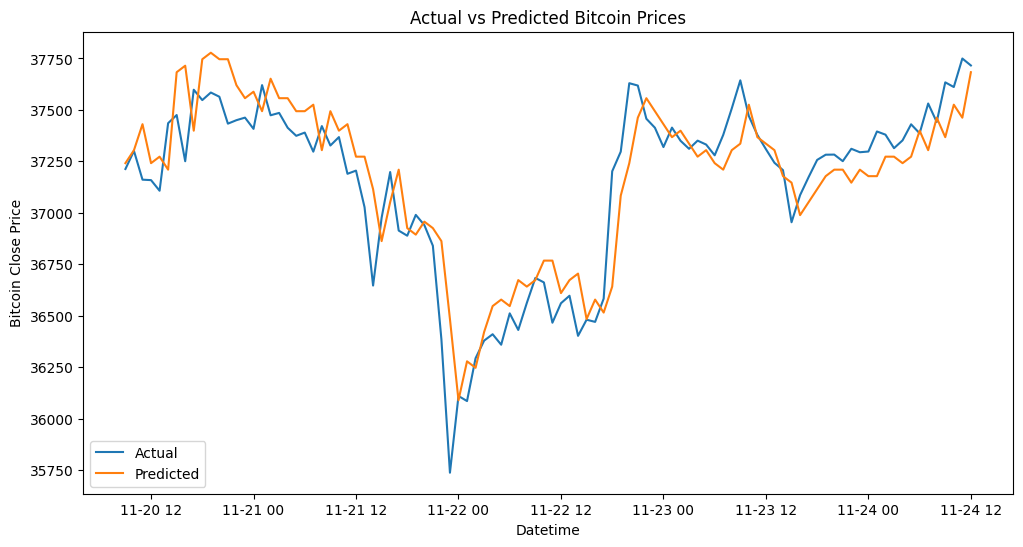

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['datetime'][-1000:-900], y_test_actual[-1000:-900], label="Actual")
plt.plot(test_data['datetime'][-1000:-900], test_predictions[-1000:-900], label="Predicted")
plt.xlabel("Datetime")
plt.ylabel("Bitcoin Close Price")
plt.title("Actual vs Predicted Bitcoin Prices")
plt.legend()
plt.show()

In [34]:
mae=np.mean(abs(y_test_actual-test_predictions))
print(f"MAE: {mae:.2f}")

MAE: 122.76


In [35]:
mape=np.mean(abs(y_test_actual-test_predictions)/y_test_actual)*100
print(f"MAPE: {mape:.2f}")

MAPE: 0.36


In [43]:
# Example data: Replace these with your actual arrays
#test_predictions = np.array([29170.6, 29202.7, 29253.9, 29140.8, 29160.8])
#y_test_actual = np.array([29170.6, 29211.0, 29254.8, 29135.0, 29160.0])

# Initial capital and portfolio setup
initial_capital = 10000  # Starting with $10,000
cash = initial_capital
bitcoin_holdings = 0

# Trading strategy simulation
for t in range(len(test_predictions) - 1):
    current_price = y_test_actual[t]  # Actual price at time t
    predicted_next_price = test_predictions[t + 1]
    
    # Buy signal: Predicted price is going up
    if predicted_next_price > y_test_actual[t]:
        # Buy Bitcoin with all available cash
        bitcoin_to_buy = cash / current_price
        bitcoin_holdings += bitcoin_to_buy
        cash = 0
    
    # Sell signal: Predicted price is going down
    elif predicted_next_price < y_test_actual[t]:
        # Sell all Bitcoin holdings
        cash += bitcoin_holdings * current_price
        bitcoin_holdings = 0

# Final portfolio value
final_price = y_test_actual[-1]  # Actual price at the last time step
final_portfolio_value = cash + bitcoin_holdings * final_price

# Calculate total return
total_return = ((final_portfolio_value - initial_capital) / initial_capital) * 100


print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Total Return: {total_return:.2f}%")

Final Portfolio Value: $12694.82
Total Return: 26.95%


In [60]:
!git clone https://github.com/ztuntrade/untrade-sdk.git

fatal: destination path 'untrade-sdk' already exists and is not an empty directory.


In [61]:
!pip install ./untrade-sdk

Processing ./untrade-sdk
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for untrade: filename=untrade-0.1.0-py3-none-any.whl size=5082 sha256=31197b3357f64b30ee36b40c8baf39aa49051fa7e417fb9f79f49806376b6a57
  Stored in directory: /root/.cache/pip/wheels/78/38/1b/d90e91a930cde98f08002408a18e115c94b1133e5955008800
Successfully built untrade


In [64]:
from untrade.client import Client

In [80]:
def perform_backtest(csv_file_path):
    client = Client()

    # Perform backtest using the provided CSV file path
    result = client.backtest(
        jupyter_id="kchitizraj", 
        file_path=csv_file_path,
        leverage=1,
    )
    return result

In [82]:
def main():
    df=pd.read_csv('/kaggle/input/zelta-btc/BTC_2020_2024_1h.csv')
    processed_data = process_data(df)
    result_data, test_result_data = strat(processed_data)
    csv_file_path = "results.csv"
    csv_file_path_test = "test_results.csv"
    result_data.to_csv(csv_file_path, index=False)
    test_result_data.to_csv(csv_file_path_test , index =False)
    
    backtest_result = perform_backtest(csv_file_path)
    
    for value in backtest_result:
       print(value)
    backtest_result = perform_backtest(csv_file_path_test)
    
    for value in backtest_result:
       print(value)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)